# Manipulating Data with Python

Import the pandas library for data analysis. See: http://pandas.pydata.org/

In [46]:
import pandas as pd

Read in the csv.

In [47]:
data = pd.read_csv("un refugee data.csv")

View the first five rows (i.e. the "head") of the data.

In [48]:
data.head()

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Internally displaced persons (IDPs),Stateless persons
0,1997,Australia,Colombia,37,NaN,NaN,NaN
1,1997,Australia,Germany,27,NaN,NaN,NaN
2,1997,Australia,Japan,1,NaN,NaN,NaN
3,1997,Australia,Mexico,2,NaN,NaN,NaN
4,1997,Australia,Thailand,8,NaN,NaN,NaN


### Select only the rows where Origin = Colombia:

In [49]:
colombia = data[data['Origin'] == 'Colombia']
colombia.head()

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Internally displaced persons (IDPs),Stateless persons
0,1997,Australia,Colombia,37,NaN,NaN,NaN
5,1997,Bolivia (Plurinational State of),Colombia,1,NaN,NaN,NaN
6,1997,Canada,Colombia,151,NaN,NaN,NaN
11,1997,Chile,Colombia,11,NaN,NaN,NaN
12,1997,Ecuador,Colombia,104,NaN,NaN,NaN


### Select only the rows where Origin = Germany:

In [50]:
germany = data[data['Origin'] == 'Germany']
germany.head()

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Internally displaced persons (IDPs),Stateless persons
1,1997,Australia,Germany,27,NaN,NaN,NaN
7,1997,Canada,Germany,401,NaN,NaN,NaN
25,1997,Sweden,Germany,8,NaN,NaN,NaN
29,1997,United States of America,Germany,7,NaN,NaN,NaN
35,1998,Australia,Germany,31,NaN,NaN,NaN


### Select only the rows where Origin = Japan:

In [51]:
japan = data[data['Origin'] == 'Japan']
japan.head()

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Internally displaced persons (IDPs),Stateless persons
2,1997,Australia,Japan,1,NaN,NaN,NaN
8,1997,Canada,Japan,1,NaN,NaN,NaN
36,1998,Australia,Japan,1,NaN,NaN,NaN
46,1998,Canada,Japan,2,NaN,NaN,NaN
82,1999,Australia,Japan,2,NaN,NaN,NaN


### Select only the rows where Origin = Mexico:

In [52]:
mexico = data[data['Origin'] == 'Mexico']
mexico.head()

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Internally displaced persons (IDPs),Stateless persons
3,1997,Australia,Mexico,2,NaN,NaN,NaN
9,1997,Canada,Mexico,391,NaN,NaN,NaN
30,1997,United States of America,Mexico,272,NaN,NaN,NaN
37,1998,Australia,Mexico,2,NaN,NaN,NaN
41,1998,Belgium,Mexico,1,NaN,NaN,NaN


### Select only the rows where Origin = Thailand:

In [53]:
thailand = data[data['Origin'] == 'Thailand']
thailand.head()

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Internally displaced persons (IDPs),Stateless persons
4,1997,Australia,Thailand,8,NaN,NaN,NaN
10,1997,Canada,Thailand,208,NaN,NaN,NaN
20,1997,Netherlands,Thailand,2,NaN,NaN,NaN
22,1997,Norway,Thailand,5,NaN,NaN,NaN
26,1997,Sweden,Thailand,47,NaN,NaN,NaN


### Save these five tables to separate csv files:

In [54]:
colombia.to_csv("colombia.csv")
germany.to_csv("germany.csv")
japan.to_csv("japan.csv")
mexico.to_csv("mexico.csv")
thailand.to_csv("thailand.csv")

### Visualize Number of Refugees per Country 

Import some visualization libraries:

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Before we visualize anything, there are some irregularities in the 'Refugees' column that we need to fix...

1) Replace all * character's with zeros:

In [56]:
data['Refugees (incl. refugee-like situations)'].replace('*', 0, inplace=True)

2) Replace NA's with zeros:

In [57]:
data['Refugees (incl. refugee-like situations)'].fillna(0, inplace=True)

3) Convert all values to integers:

In [58]:
data['Refugees (incl. refugee-like situations)'] = data['Refugees (incl. refugee-like situations)'].astype(int)

Now that the data is clean, we can analyze it.

### How many refugees are there per Origin country, across all years in the dataset?

In [99]:
g = data.groupby(by='Origin').sum()['Refugees (incl. refugee-like situations)']
g = pd.DataFrame(g)
g

,Refugees (incl. refugee-like situations)
Origin,
Colombia,3884686
Germany,8046
Japan,2168
Mexico,88832
Thailand,12308


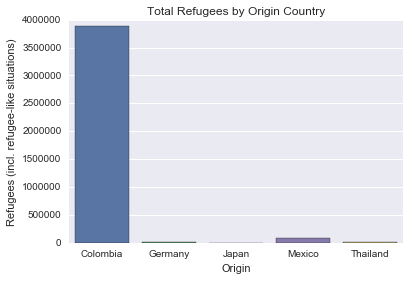

In [106]:
sns.barplot(x=g.index, y="Refugees (incl. refugee-like situations)", data = g, ci=None)
plt.title("Total Refugees by Origin Country")
plt.ylabel("Refugees (incl. refugee-like situations)");

### How many refugees are per Origin country per year?

In [148]:
g = data.groupby(by=['Origin', 'Year']).sum()['Refugees (incl. refugee-like situations)']
g = pd.DataFrame(g)
g = g.unstack(level=0)
g

Refugees (incl. refugee-like situations)                              
Origin                                 Colombia Germany Japan Mexico Thailand
Year                                                                         
1997                                       2377     443     2    665      272
1998                                       3538     688     3   1016      295
1999                                       4413    1298     3   1359      318
2000                                       9279    1183     5   1291      217
2001                                      17938    1033     5   1594       94
2002                                      30625     928    19   1670      344
2003                                      37995     725    19   1652      296
2004                                      47381      78    21   1744      319
2005                                      60450      78    13   2313      424
2006                                      72796     114   168   3304     3325
2007                                     551744     129   521   5572     2325
2008                                     373532     166   185   6162     1815
2009                                     389753     170   150   6435      502
2010                                     395577     164   152   6816      356
2011                                     395949     174   176   7472      368
2012                                     394117     182   172   8435      381
2013                                     396717     175   157   9390      222
2014                                     360281     165   257  10637      225
2015                                     340224     153   140  11305      210

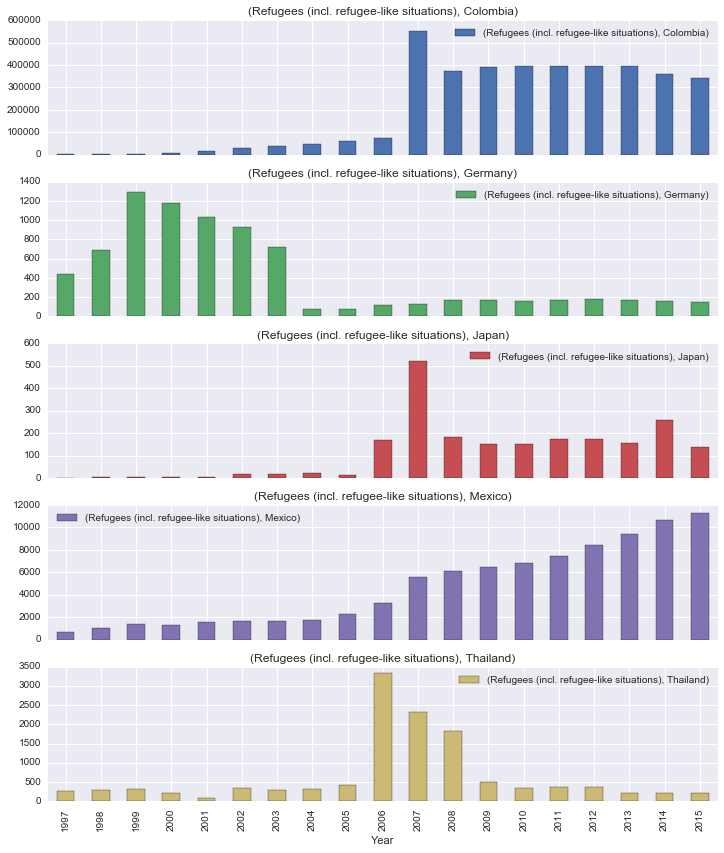

In [153]:
g.plot(kind='bar', subplots=True, figsize=(12,14));